In [5]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline 
import scipy.misc
import imageio

class neuralNetwork:
    
    def __init__(self, inputnodes,hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)    
        self.activation_function = lambda x: scipy.special.expit(x)
        pass

    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
       
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

        pass

    def query(self, inputs_list):
       
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


Error: Jupyter cannot be started. Error attempting to locate jupyter: Data Science libraries jupyter and notebook are not installed in interpreter Python 3.8.2 64-bit.

In [7]:

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)


In [8]:
training_data_file = open("/home/nishi/Documents/coding/python/mnist_folder/mnist_train_100.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [9]:
epochs = 5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

loading ... my_own_images/2828_my_own_image.png
min =  0.01
max =  1.0
[[1.87165664e-03]
 [6.71530360e-03]
 [9.63333485e-01]
 [1.21061721e-03]
 [6.89962380e-03]
 [3.13527536e-02]
 [1.24453407e-02]
 [5.44211777e-02]
 [1.41664878e-03]
 [6.93161465e-04]]
network says  2


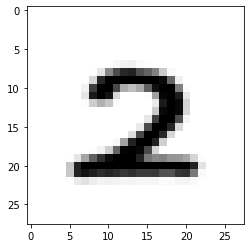

In [12]:

print ("loading ... my_own_images/2828_my_own_image.png")
img_array = imageio.imread("/home/nishi/Documents/coding/python/mnist_folder/c9b9da8c6dce5f66ea6a17ab3a46b91e_t.png", as_gray=True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min = ", numpy.min(img_data))
print("max = ", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

outputs = n.query(img_data)
print (outputs)

label = numpy.argmax(outputs)
print("network says ", label)

